In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# Activation Functions

A small notebook that documents different popular activation functions used in neural networks, their behavior, pros/cons and use cases.

In [2]:
# Here are some helper functions that are used throughout the notebook

def derivative(function, x):
    x = torch.tensor(x, requires_grad=True)
    y = function(x)
    y.backward()
    return x.grad.item()

def plot(activation, name, formula):   
    x_values = torch.linspace(-3, 3, 100)
    y_values = [activation(x).item() for x in x_values]
    dy_values = [derivative(activation, x) for x in x_values]
    # Plotting
    plt.figure(figsize=(8, 4))
    plt.plot(x_values, y_values, label="f(x) = " + formula)
    plt.plot(x_values, dy_values, label="f'(x)", linestyle='--')
    plt.title(name)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

## Linear Activation

### Formula
$f(x) = x$

### Derivative
$f'(x) = 1$

### Behavior
A straight line that passes through origin with slope of 1, and its derivative is a constant value of 1.

### Cons
Pretty useless since it does not do anything to our data. When designing ANNs, we would like nonlinearity between each layer of the network so we can approximate more complex functions. If we had a multi-layer neural network with a linear activation function, we are just doing a linear combination, which means you might as well have a single-layer neural network with the same number of weights. The model is no more expressive that standard logistic regression.

/var/folders/5t/1wwb4x_d4hd53smqcd96d_500000gn/T/ipykernel_62561/979438934.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, requires_grad=True)


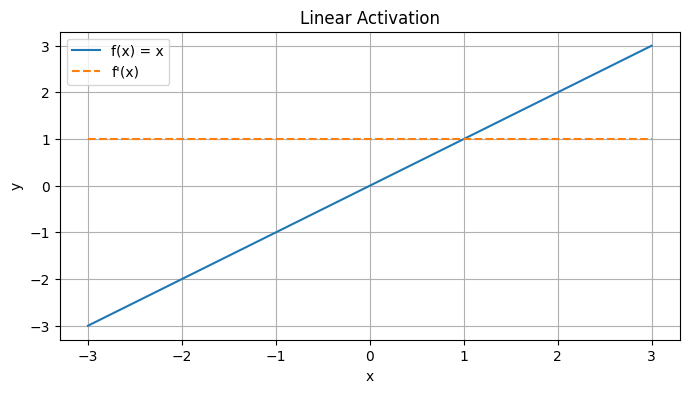

In [3]:
def linear(x):
    return x

plot(linear, 'Linear Activation', 'x')

## ReLU

### Formula
$
f(x) = \text{max}(0,x) = 
\begin{cases} 
x & \text{if } x \geq 0 \\
0 & \text{if } x < 0
\end{cases}
$

### Derivative
$
f(x) = 
\begin{cases} 
1 & \text{if } x \geq 0 \\
0 & \text{if } x < 0
\end{cases}
$

### Behavior
Outputs zero when the input is negative, and x when x is positive. Its derivative is 1 when x is positive and 0 when x is negative. It is not differentiable at $x = 0$.

### Pros
Very popular choice to build ANNs, mainly because it creates sparse models, since neurons with negative pre-activation values get zeroed out. Sparse models are generally very computationally and memory efficient, and have improved generalization capabilities. There is also a reduced likelihood of vanishing gradient problem if the pre-activation value is 1 since the gradient is a constant, rather than a potentially incredibly small float, which occurs with tanh and sigmoid activation values. Also the gradient is either 0 or 1, which makes backpropagation simple.

### Cons
Once a neuron activation becomes 0, the particular neuron can no longer affect the parameters of the network during backprop, since its value and gradient becomes 0 and gradient flow is ceased. This is called the Dying ReLU problem. Also there is a positive bias shift in the network since the mean activation is larger than 0, which can slow down learning. Also, the activation function is not upper-bounded, so exploding gradient problem can occur.

/var/folders/5t/1wwb4x_d4hd53smqcd96d_500000gn/T/ipykernel_62561/979438934.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, requires_grad=True)


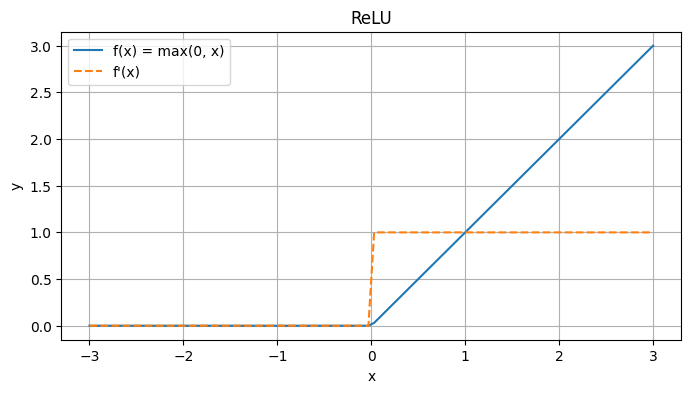

In [4]:
def ReLU(x):
    return torch.max(torch.tensor(0), x)

plot(ReLU, 'ReLU', 'max(0, x)')

## Leaky ReLU

### Formula
$
f(x) = \text{max}(\alpha x,x) = 
\begin{cases} 
x & \text{if } x \geq 0 \\
\alpha x & \text{if } x < 0
\end{cases}
\text{where } 0 \leq \alpha \leq 1
$

### Derivative
$
f'(x) = 
\begin{cases} 
1 & \text{if } x \geq 0 \\
\alpha & \text{if } x < 0
\end{cases}
$

### Behavior
Similar to ReLU but introduced a small slope for inputs left of x = 0, thereby slightly extending the range of ReLU. Thus, the gradient is still constant, but not 0.

### Pros
Fixes the Dying ReLU problem, as there are now non-zero gradients for negative inputs instead of 0, and backprop is still simple since the gradient is a constant. Gradient flow is more stable than ReLU. It also mitigates the vanishing gradient problem like ReLU. Since negative values are now possible too, you also fix the positive bias in ReLU

### Cons
Exploding gradient problem still exist, also you lose the sparsity from ReLU. Also so you have another parameter $\alpha$ to tune. 

### Note
There is another variant called parametric ReLU (PReLU) where $\alpha$ is a learnable parameter instead of a fixed constant. The benefits of this including having adaptive negative slope that best fit to the data, along with the other benefits of leaky relu. The cons of this approach is that it adds to the computational complexity, since you are introducing an extra learning parameter. Also this parameter could lead to overfitting, and generally increasing the complexity of implementing and optimizing the model.

/var/folders/5t/1wwb4x_d4hd53smqcd96d_500000gn/T/ipykernel_62561/979438934.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, requires_grad=True)


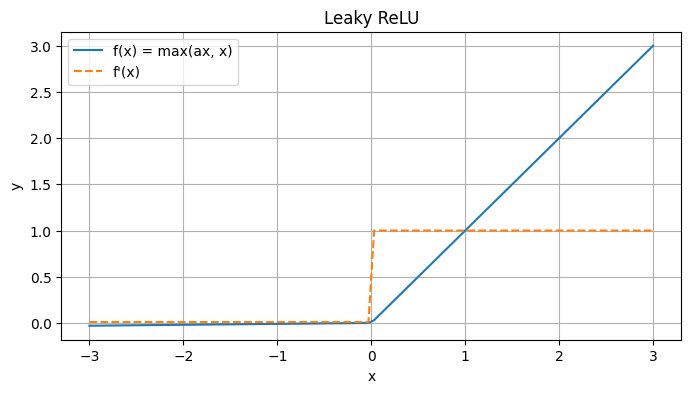

In [5]:
def leaky_relu(x, alpha=0.01):
    return torch.where(x > 0, x, x * alpha)

plot(leaky_relu, 'Leaky ReLU', "max(ax, x)")

## Sigmoid

### Formula
$
\sigma(x) = \frac{1}{1+e^{-x}}
$

### Derivative
$
\sigma'(x) = \frac{e^{-x}}{(1+e^{-x})^2} = \sigma(x)(1-\sigma(x))
$

### Behavior
A smooth version of the step function. Its range is (0,1). Unlike ReLU and its variants, its derivative and itself are continuous at $x=0$. It is generally used in the last layer of neural networks for binary classification, and a gating mechanism in RNNS.

### Pros
Because of its range (0,1), its output can be interpreted as probabilites, and it has a clear threshold at x = 0, where the output is 0.5. This makes it useful for binary classification. Also the function is smooth and differentiable, which ensures stable updates during backprop. 

### Cons
When x becomes a very large positive or negative number, teh sigmoid becomes saturated and as a result the derivative of sigmoid approaches 0. This is known as a the vanishing gradient problem. This can significantly slow down training. Also when a neuron gets saturated, small changes in the input do not lead to changes in the output. It is also generally more computationally expensive than ReLU.

### Note
There is another variant called parametric ReLU (PReLU) where $\alpha$ is a learnable parameter instead of a fixed constant. The benefits of this including having adaptive negative slope that best fit to the data, along with the other benefits of leaky relu. The cons of this approach is that it adds to the computational complexity, since you are introducing an extra learning parameter. Also this parameter could lead to overfitting, and generally increasing the complexity of implementing and optimizing the model.

/var/folders/5t/1wwb4x_d4hd53smqcd96d_500000gn/T/ipykernel_62561/979438934.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, requires_grad=True)


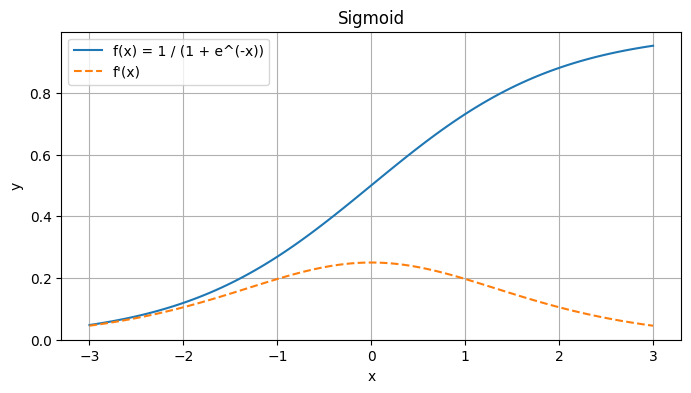

In [6]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

plot(sigmoid, 'Sigmoid', "1 / (1 + e^(-x))")

## Tanh

### Formula
$
\tanh(x) = \frac{e^x-e^{-x}}{e^x+e^{-x}}
$

### Derivative
$
\tanh'(x) = 1-\tanh^{2}(x)
$

### Behavior
It's range is (-1,1). Used in hidden layers in neural networks, but still not as popular as ReLU. It is also used in the RNNs.

### Pros
Its zero centered unlike sigmoid, so its gradients updates can be positive or negative, which makes training more efficient. The gradients are steepers, which can lead to faster convergence.

### Cons
It still suffers from the output saturation, computational complexity, and vanishing gradient problems present in sigmoid.

/var/folders/5t/1wwb4x_d4hd53smqcd96d_500000gn/T/ipykernel_62561/979438934.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, requires_grad=True)


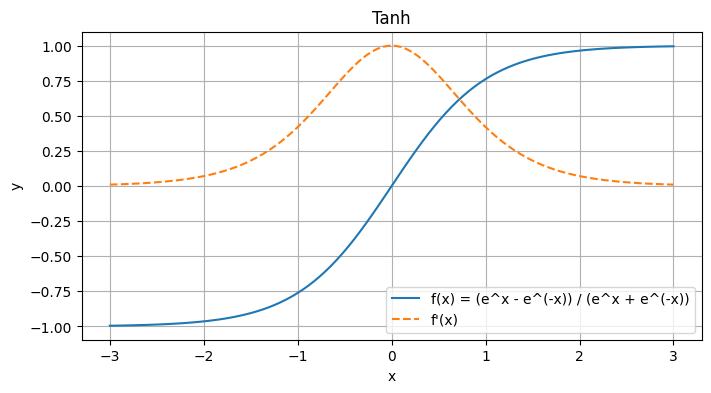

In [7]:
def tanh(x):
    return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

plot(tanh, 'Tanh', "(e^x - e^(-x)) / (e^x + e^(-x))")

## Softplus

### Formula
$
f(x) = \ln(1+e^x)
$

### Derivative
$
f'(x) = \frac{e^x}{1+e^x} = \sigma(x)
$

### Behavior
Smooth version of ReLU and is differentiable from the origin. Its derivative is the sigmoid function.

### Pros
It is smooth and differentiable everywhere, it does not have the dying ReLU problem, and it has a bounded gradient which can increase training stability
### Cons
It has pretty high computational complexity, it does not have the sparisty of ReLU, and it generally converges slower than ReLU.

/var/folders/5t/1wwb4x_d4hd53smqcd96d_500000gn/T/ipykernel_62561/979438934.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, requires_grad=True)


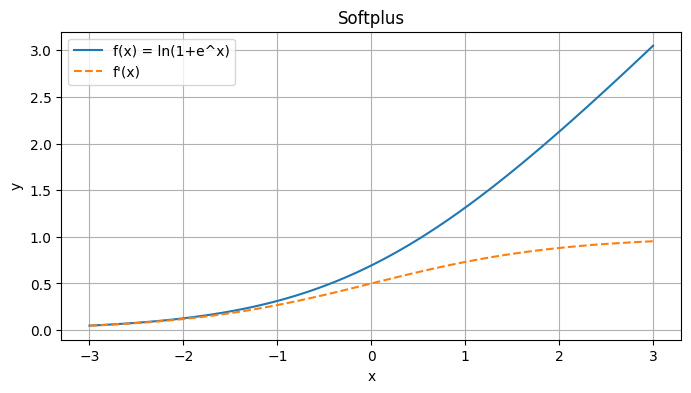

In [8]:
def softplus(x):
    return torch.log(1 + torch.exp(x))

plot(softplus, 'Softplus', "ln(1+e^x)")

## Exponential Linear Unit (ELU)

### Formula
$
f(x) = 
\begin{cases} 
x & \text{if } x > 0 \\
\alpha(e^x - 1) & \text{if } x \leq 0
\end{cases}
\text{where } 0 \leq \alpha
$

### Derivative
$
f'(\alpha, x) = 
\begin{cases} 
1 & \text{if } x > 0 \\
\alpha e^x  = f(\alpha,x) + \alpha & \text{if } x \leq 0
\end{cases}
\text{where } 0 \leq \alpha
$

### Behavior
Similar to ReLU, but by introducing a hyperparmeter, the mean activation gets shift closer to 0, as negative outputs get smoother to $-\alpha$. A smooth and differentiable curve when $\alpha = 1$. 
### Pros
mitigates teh vanishing gradient problem since it has non-zero gradients fro negative inputs. The outputs are almost zero-centered, which allows for faster convergence. 
### Cons
For really high positive values, it can blow up the activation due to its output range. It also requires hyperparameter tuning

/var/folders/5t/1wwb4x_d4hd53smqcd96d_500000gn/T/ipykernel_62561/979438934.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, requires_grad=True)


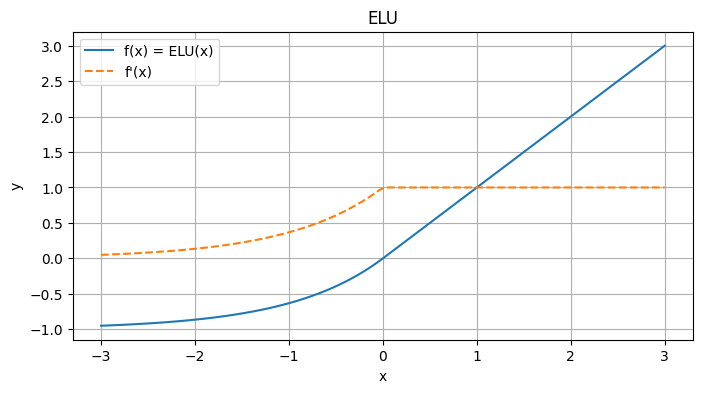

In [9]:
def elu(x, alpha=1):
    return torch.where(x > 0, x, alpha*(torch.exp(x) - 1))

plot(elu, 'ELU', "ELU(x)")

## Scaled Exponential Linear Unit (SELU)

### Formula
$
f(x) = \lambda
\begin{cases} 
x & \text{if } x > 0 \\
\alpha(e^x - 1) & \text{if } x \leq 0
\end{cases}
\text{where } 0 \leq \alpha
$

### Derivative
$
f'(\alpha, x) = \lambda 
\begin{cases} 
1 & \text{if } x > 0 \\
\alpha e^x & \text{if } x \leq 0
\end{cases}
\text{where } 0 \leq \alpha
$

### Behavior
similar to ELU, but tries to converge the neurons activations towards zero mean and unit variance
### Pros
It is self normalizing which maintains stability of the network during training, and reduces the need to batch norm. It also mitigates both vanishing an exploding gradient problems.
### Cons
Requires network weights to be initialized with a specific method, and works best with certain network architectures such as FFN. It has very limited use case, and does not transfer effectively to cnns or nns. It can also be negatively saturated, and is computationally complex.

/var/folders/5t/1wwb4x_d4hd53smqcd96d_500000gn/T/ipykernel_62561/979438934.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, requires_grad=True)


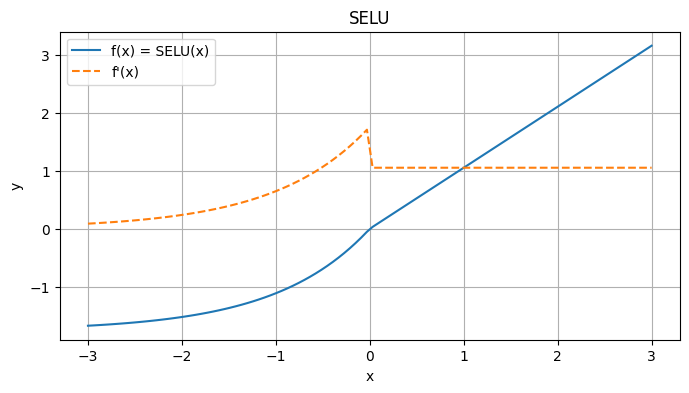

In [10]:
def selu(x, alpha=1.67326, l=1.0507):
    return torch.where(x > 0, l * x, l * alpha * (torch.exp(x) - 1))

plot(selu, 'SELU', "SELU(x)")

## Swish

### Formula
$
f(x) = x \cdot \sigma(\beta x) = \frac{x}{1+e^{-\beta x}}
$

### Derivative
$
f'(x) = \beta f(x) + \sigma(\beta x)(1-\beta f(x)) = \sigma(\beta x)(1+\beta x(1-\sigma(\beta x)))
$

### Behavior
Beta is a learnable parameter. It is usually default initialized to 1.0, and if it is removed from the formula, its becomes a sigmoid linear unit (SiLU). Has outperformed ReLU and Sigmoid in several applications. It is a non-monotonic function. A monotonic function is a function which is either entirely non-increasing or non-decreasing. A function is monotonic if its first derivative (which need not be continuous) does not change sign. If we go from left to right, the output of swish is first decreasing and then increases. Thus, the gradient has both positive and negative values.

### Pros
It is self normalizing which maintains stability of the network during training, and reduces the need to batch norm. It also mitigates both vanishing an exploding gradient problems.
### Cons
Requires network weights to be initialized with a specific method, and works best with certain network architectures such as FFN. It has very limited use case, and does not transfer effectively to cnns or nns. It can also be negatively saturated, and is computationally complex.

/var/folders/5t/1wwb4x_d4hd53smqcd96d_500000gn/T/ipykernel_62561/979438934.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, requires_grad=True)


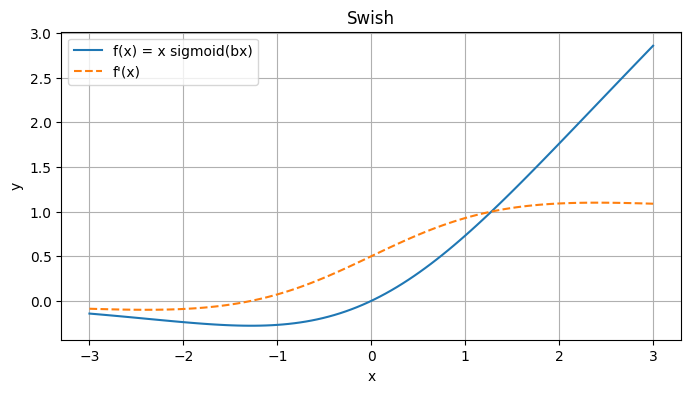

In [15]:
def swish(x, beta=1.0):
    return x * sigmoid(beta * x)

plot(swish, 'Swish', "x sigmoid(bx)")

SWIGLU
GELU
GEGLU